<p style="text-align: center;">Модель страховой компании</p>
<p style="text-align: center;">ВШЭ</p>
<p style="text-align: center;">2021-2022</p>


### Суть 

На сайте [Спарк](https://spark-interfax.ru/) доступны отчетности страховых компании (Жизнь) за 2016-2019 года.

Делаем 4 регресии на 4 датасетах (2016,2017,2018,2019), получаем 4 модели. Итоговая модель - усредненные прогнозы этих 4 регрессий, причем чем ближе год модели, тем выше коэффициент у регрессии.

Чтобы получить данные за (2020,2021 и 2022) выбираем темп роста по всем показателям (4 сценария, см ниже) и просто последовательно домножаем.

Запустите все ячейки (Среда выполнения -> выполнить все) и прокрутите в самый низ, где Вас будет ждать ввод интересующего сценария


### Содержание

1. [Предобработка данных ](#1)
2. [Регрессия](#2)
3. [Игра](#3)
4. [Задача](#4)
5. [Справка](#5)

---

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

import os
import io

### 1. Предобработка данных  <a name="1"></a>

Считаем все данные

In [ ]:
name = ['2019, Заключено договоров',
       '2019, Средняя страховая премия, RUB',
       '2019, Количество страховых выплат, разы',
       '2019, Средняя страховая выплата, RUB',
        
       '2019, Капитал, RUB',
       '2019, Страховые резервы, RUB',
       '2019, Кредиторская задолженность, RUB',
       '2019, Активы, RUB',
        
        '2019, Доля отказов выплат, %',
        '2019, Доля расходов на ведение дела (РВД), %',
        
       '2019, Текущая платежеспособность, %']

# вот такие переменные в итог будем использовать
X_name = ['2019, Заключено договоров',
          '2019, Средняя страховая премия, RUB',
          '2019, Количество страховых выплат, разы',
          '2019, Средняя страховая выплата, RUB',
          'Капитал/Активы',
          'Страховые резервы/Активы',
          'Кредиторская задолженность/Активы',
          '2019, Доля отказов выплат, %',
           '2019, Доля расходов на ведение дела (РВД), %'
         ]
# предсказывать будем вот это
y_name = '2019, Текущая платежеспособность, %'

#[x.replace('2019','2016') for x in X_name]

2016

In [ ]:
df = pd.read_excel('https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/spark2016.xlsx?raw=true')

df.index = df['Наименование']
# взяли только интересующие колонки
df = df[[x.replace('2019','2016') for x in name]]

# убрали выбросы
q1 = df.quantile(0.01)
q2 = df.quantile(0.99)
df = df[~((df < q1) |(df> q2)).any(axis=1)]

# создали нужные дополнительные колонки 
df_test = df.copy()
df_test['Капитал/Активы'] = df_test['2016, Капитал, RUB'] / df_test['2016, Активы, RUB']
df_test['Страховые резервы/Активы'] = df_test['2016, Страховые резервы, RUB'] /df_test['2016, Активы, RUB']
df_test['Кредиторская задолженность/Активы'] = df_test['2016, Кредиторская задолженность, RUB'] / df_test['2016, Активы, RUB']
df_test['2016, Средняя страховая премия, RUB'] = np.log(df_test['2016, Средняя страховая премия, RUB'])
df_test['2016, Средняя страховая выплата, RUB'] = np.log(df_test['2016, Средняя страховая выплата, RUB'])
df = df_test.copy()

#убрали NaN
df.dropna(inplace=True)

X2016 = df[[x.replace('2019','2016') for x in X_name]]
y2016 = df['2016, Текущая платежеспособность, %']


2017

In [ ]:
df = pd.read_excel('https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/spark2017.xlsx?raw=true')
df.index = df['Наименование']
# взяли только интересующие колонки
df = df[[x.replace('2019','2017') for x in name]]

# убрали выбросы
q1 = df.quantile(0.01)
q2 = df.quantile(0.99)
df = df[~((df < q1) |(df> q2)).any(axis=1)]

# создали нужные дополнительные колонки 
df_test = df.copy()
df_test['Капитал/Активы'] = df_test['2017, Капитал, RUB'] / df_test['2017, Активы, RUB']
df_test['Страховые резервы/Активы'] = df_test['2017, Страховые резервы, RUB'] /df_test['2017, Активы, RUB']
df_test['Кредиторская задолженность/Активы'] = df_test['2017, Кредиторская задолженность, RUB'] / df_test['2017, Активы, RUB']
df_test['2017, Средняя страховая премия, RUB'] = np.log(df_test['2017, Средняя страховая премия, RUB'])
df_test['2017, Средняя страховая выплата, RUB'] = np.log(df_test['2017, Средняя страховая выплата, RUB'])
df = df_test.copy()

#убрали NaN
df.dropna(inplace=True)

X2017 = df[[x.replace('2019','2017') for x in X_name]]
y2017 = df['2017, Текущая платежеспособность, %']


2018


In [ ]:
df = pd.read_excel('https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/spark2018.xlsx?raw=true')
df.index = df['Наименование']
# взяли только интересующие колонки
df = df[[x.replace('2019','2018') for x in name]]

# убрали выбросы
q1 = df.quantile(0.01)
q2 = df.quantile(0.99)
df = df[~((df < q1) |(df> q2)).any(axis=1)]

# создали нужные дополнительные колонки 
df_test = df.copy()
df_test['Капитал/Активы'] = df_test['2018, Капитал, RUB'] / df_test['2018, Активы, RUB']
df_test['Страховые резервы/Активы'] = df_test['2018, Страховые резервы, RUB'] /df_test['2018, Активы, RUB']
df_test['Кредиторская задолженность/Активы'] = df_test['2018, Кредиторская задолженность, RUB'] / df_test['2018, Активы, RUB']
df_test['2018, Средняя страховая премия, RUB'] = np.log(df_test['2018, Средняя страховая премия, RUB'])
df_test['2018, Средняя страховая выплата, RUB'] = np.log(df_test['2018, Средняя страховая выплата, RUB'])
df = df_test.copy()

#убрали NaN
df.dropna(inplace=True)

X2018 = df[[x.replace('2019','2018') for x in X_name]]
y2018 = df['2018, Текущая платежеспособность, %']


2019

In [ ]:
df = pd.read_excel('https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/spark2019.xlsx?raw=true')
df.index = df['Наименование']
# взяли только интересующие колонки
df = df[[x.replace('2019','2019') for x in name]]

# убрали выбросы
q1 = df.quantile(0.01)
q2 = df.quantile(0.99)
df = df[~((df < q1) |(df> q2)).any(axis=1)]

# создали нужные дополнительные колонки 
df_test = df.copy()
df_test['Капитал/Активы'] = df_test['2019, Капитал, RUB'] / df_test['2019, Активы, RUB']
df_test['Страховые резервы/Активы'] = df_test['2019, Страховые резервы, RUB'] /df_test['2019, Активы, RUB']
df_test['Кредиторская задолженность/Активы'] = df_test['2019, Кредиторская задолженность, RUB'] / df_test['2019, Активы, RUB']
df_test['2019, Средняя страховая премия, RUB'] = np.log(df_test['2019, Средняя страховая премия, RUB'])
df_test['2019, Средняя страховая выплата, RUB'] = np.log(df_test['2019, Средняя страховая выплата, RUB'])
df = df_test.copy()

#убрали NaN
df.dropna(inplace=True)

X2019 = df[[x.replace('2019','2019') for x in X_name]]
y2019 = df['2019, Текущая платежеспособность, %']


In [ ]:
# Чтобы дальше не было проблем, 
# переобозначим все колонки как 2019
X2016.columns = X2019.columns
X2017.columns = X2019.columns
X2018.columns = X2019.columns

# То есть дальше во всех колонках
# будет написано 2019, хотя по факту
# не всегда так

Средний темп роста считаем так (один из возможных сценариев)
$$ \text{Темп роста} = \frac{1 \cdot \text{Темп роста}_{2016-2017} + 2 \cdot \text{Темп роста}_{2017-2018} + 3 \cdot \text{Темп роста}_{2018-2019}}{1 + 2 + 3}$$

In [ ]:
# средние темпы роста всех колонок (далее он будет располагаться
# 4ым в списе temps)
temp_rosta = (1*(X2017 / X2016).mean() + 2*(X2018 / X2017).mean() + 3*(X2019 / X2018).mean())/6
temp_rosta

2019, Заключено договоров                       2.433846
2019, Средняя страховая премия, RUB             0.996185
2019, Количество страховых выплат, разы         1.349760
2019, Средняя страховая выплата, RUB            1.004085
Капитал/Активы                                  1.000656
Страховые резервы/Активы                        1.054851
Кредиторская задолженность/Активы               1.106016
2019, Доля отказов выплат, %                    1.734244
2019, Доля расходов на ведение дела (РВД), %    1.213404
dtype: float64

### 2. Регрессия <a name="2"></a>

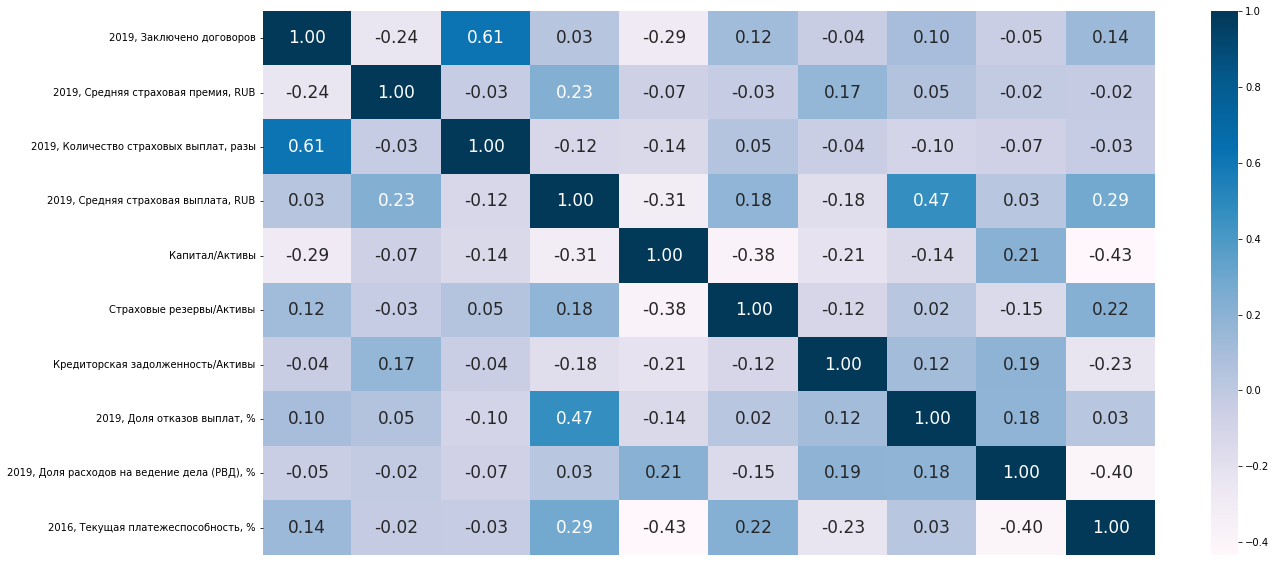

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(pd.concat([X2016,y2016],axis=1).corr(),annot=True,xticklabels=False,fmt='.2f',ax=ax,annot_kws={"fontsize":17},cmap="PuBu")

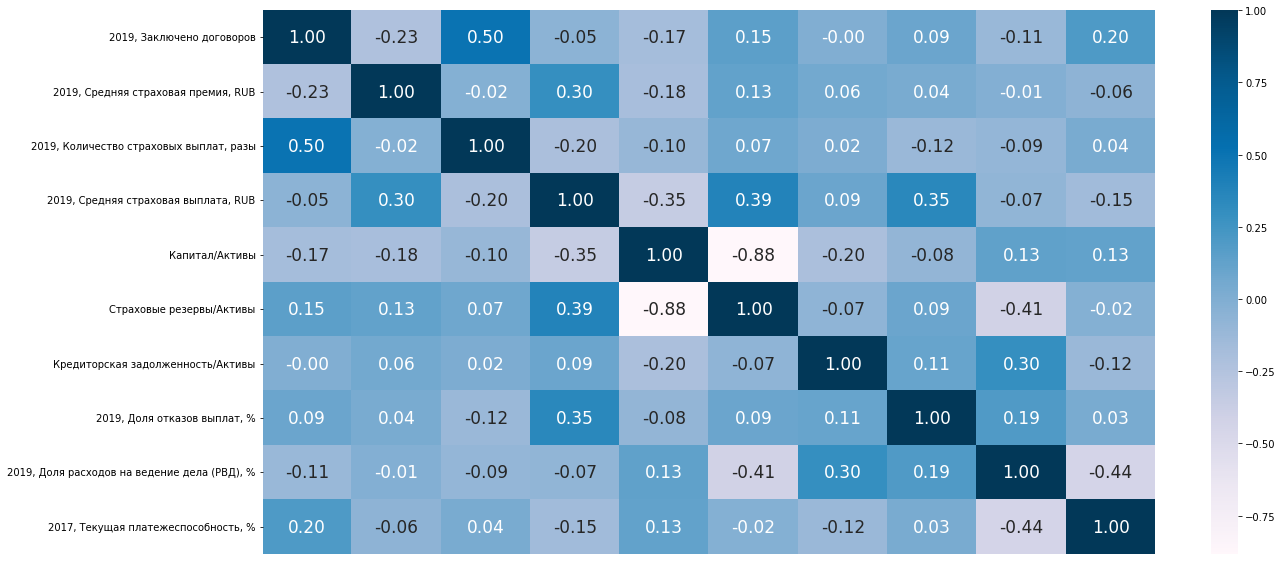

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(pd.concat([X2017,y2017],axis=1).corr(),annot=True,xticklabels=False,fmt='.2f',ax=ax,annot_kws={"fontsize":17},cmap="PuBu")

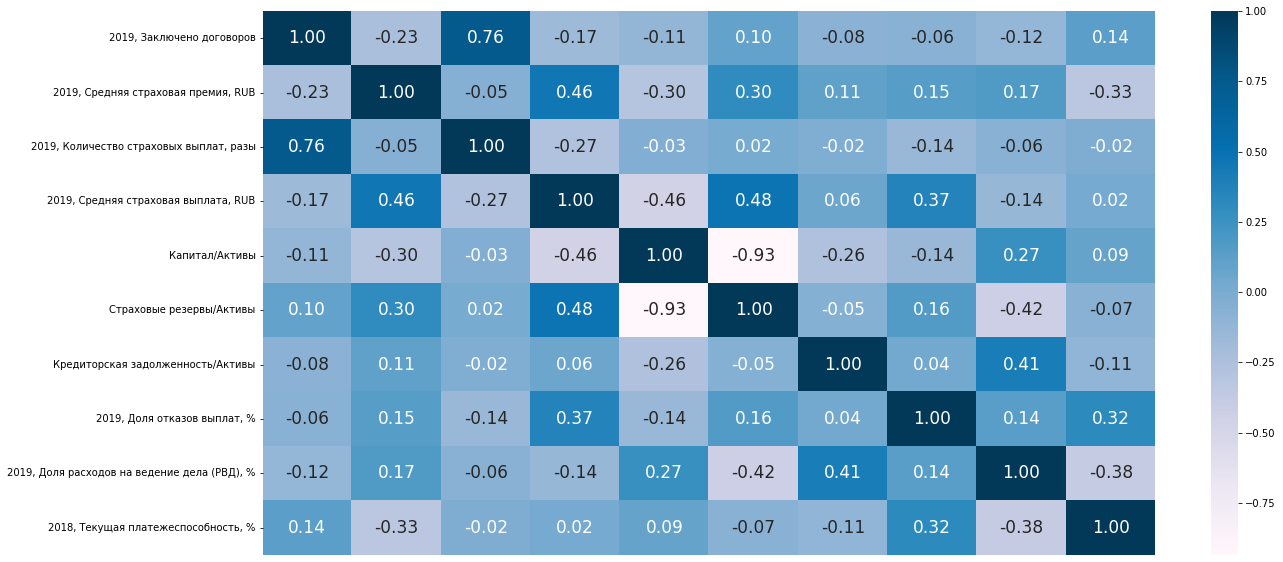

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(pd.concat([X2018,y2018],axis=1).corr(),annot=True,xticklabels=False,fmt='.2f',ax=ax,annot_kws={"fontsize":17},cmap="PuBu")

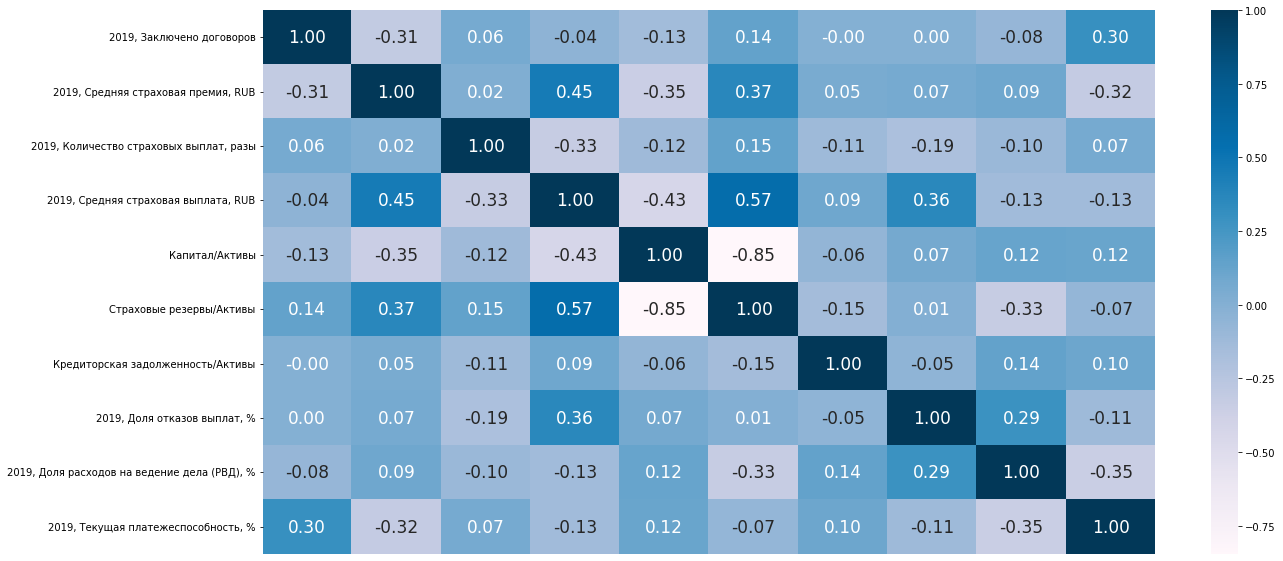

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(pd.concat([X2019,y2019],axis=1).corr(),annot=True,xticklabels=False,fmt='.2f',ax=ax,annot_kws={"fontsize":17},cmap="PuBu")

Данных мало и часть из них сильно коррелируют, значит нужно регуляризовать, иначе будет переобучение.

In [ ]:
# модель 2019
X_train, X_test, y_train, y_test = train_test_split(X2019, y2019,test_size = 0.2, random_state=404)

# стандартизируем данные
stsc2019 = StandardScaler()
stsc2019.fit_transform(X_train)
stsc2019.transform(X_test)

# используем ridge регрессию
ridge_cv2019 = RidgeCV(alphas=np.linspace(0.1,1000,100))
ridge_cv2019.fit(X_train,y_train)

y_pred = ridge_cv2019.predict(X_test)
print('r2 =',np.round(r2_score(y_test,y_pred),4),
      'MSE =', np.round(mean_squared_error(y_test,y_pred),4))

r2 = 0.1194 MSE = 0.2009


In [ ]:
# модель 2018
X_train, X_test, y_train, y_test = train_test_split(X2018, y2018,test_size = 0.2, random_state=404)

# стандартизируем данные
stsc2018 = StandardScaler()
stsc2018.fit_transform(X_train)
stsc2018.transform(X_test)

# используем ridge регрессию
ridge_cv2018 = RidgeCV(alphas=np.linspace(0.1,1000,100))
ridge_cv2018.fit(X_train,y_train)

y_pred = ridge_cv2018.predict(X_test)
print('r2 =',np.round(r2_score(y_test,y_pred),4),
      'MSE =', np.round(mean_squared_error(y_test,y_pred),4))

r2 = 0.2654 MSE = 0.2204


In [ ]:
# модель 2017
X_train, X_test, y_train, y_test = train_test_split(X2017, y2017,test_size = 0.2, random_state=404)

# стандартизируем данные
stsc2017 = StandardScaler()
stsc2017.fit_transform(X_train)
stsc2017.transform(X_test)

# используем ridge регрессию
ridge_cv2017 = RidgeCV(alphas=np.linspace(0.1,1000,100))
ridge_cv2017.fit(X_train,y_train)

y_pred = ridge_cv2017.predict(X_test)
print('r2 =',np.round(r2_score(y_test,y_pred),4),
      'MSE =', np.round(mean_squared_error(y_test,y_pred),4))

r2 = 0.1451 MSE = 0.5147


In [ ]:
# модель 2016
X_train, X_test, y_train, y_test = train_test_split(X2016, y2016,test_size = 0.2, random_state=404)

# стандартизируем данные
stsc2016 = StandardScaler()
stsc2016.fit_transform(X_train)
stsc2016.transform(X_test)

# используем ridge регрессию
ridge_cv2016 = RidgeCV(alphas=np.linspace(0.1,1000,100))
ridge_cv2016.fit(X_train,y_train)

y_pred = ridge_cv2016.predict(X_test)
print('r2 =',np.round(r2_score(y_test,y_pred),4),
      'MSE =', np.round(mean_squared_error(y_test,y_pred),4))

r2 = 0.3001 MSE = 0.2537


$$ model(x) = \frac{1 \cdot model_{2016}(x) + 2 \cdot model_{2017}(x) + 3 \cdot model_{2018}(x) + 4 \cdot model_{2019}(x)}{1 + 2 + 3 + 4} $$

In [ ]:
model = lambda x : (1*ridge_cv2016.predict(x)+2*ridge_cv2017.predict(x) + 3*ridge_cv2018.predict(x) + 4*ridge_cv2019.predict(x))/(1+2+3+4)

### 3. Игра <a name="3"></a>

In [ ]:
# оптимистичный темп роста (как пример)
# отметим, что просто все коэф повысить нельзя)))
temp_rosta_opt = temp_rosta.copy()
temp_rosta_opt.iloc[0] = 1.7
temp_rosta_opt.iloc[1] = 1.7
temp_rosta_opt.iloc[2] = 0.8
temp_rosta_opt.iloc[3] = 1
temp_rosta_opt.iloc[4] = 1
temp_rosta_opt.iloc[5] = 1
temp_rosta_opt.iloc[6] = 0.5
temp_rosta_opt.iloc[7] = 1
temp_rosta_opt.iloc[8] = 1
temp_rosta_opt

2019, Заключено договоров                       1.7
2019, Средняя страховая премия, RUB             1.7
2019, Количество страховых выплат, разы         0.8
2019, Средняя страховая выплата, RUB            1.0
Капитал/Активы                                  1.0
Страховые резервы/Активы                        1.0
Кредиторская задолженность/Активы               0.5
2019, Доля отказов выплат, %                    1.0
2019, Доля расходов на ведение дела (РВД), %    1.0
dtype: float64

In [ ]:
# пессимистичный темп роста (как пример)
temp_rosta_pes = temp_rosta.copy()
temp_rosta_pes.iloc[0] = 0.5
temp_rosta_pes.iloc[1] = 0.5
temp_rosta_pes.iloc[2] = 1.5
temp_rosta_pes.iloc[3] = 1.5
temp_rosta_pes.iloc[4] = 1.5
temp_rosta_pes.iloc[5] = 1.5
temp_rosta_pes.iloc[6] = 1.5
temp_rosta_pes.iloc[7] = 1.5
temp_rosta_pes.iloc[8] = 1.5
temp_rosta_pes

2019, Заключено договоров                       0.5
2019, Средняя страховая премия, RUB             0.5
2019, Количество страховых выплат, разы         1.5
2019, Средняя страховая выплата, RUB            1.5
Капитал/Активы                                  1.5
Страховые резервы/Активы                        1.5
Кредиторская задолженность/Активы               1.5
2019, Доля отказов выплат, %                    1.5
2019, Доля расходов на ведение дела (РВД), %    1.5
dtype: float64

#### После данной ячейки сам интерактив

Добрый день!
Мы построим прогноз величины "Текущая платежеспособность, %" на 2020, 2021 и 2022 года
Введите номер интересующей вас компании: 
1) СБЕРБАНК СТРАХОВАНИЕ ЖИЗНИ, ООО СК
2) РОСГОССТРАХ ЖИЗНЬ, ООО СК
3) СК СОГАЗ-ЖИЗНЬ, ООО
4) СК РЕНЕССАНС ЖИЗНЬ, ООО
5) ТИНЬКОФФ СТРАХОВАНИЕ, АО

###############
2
###############

Теперь выберите, пожалуйста, интересующий вас сценарий развития: 
1) оптимистичные темпы роста
2) пессимистичные темпы роста
3) случайный сэмпл темпа роста из имеющегося распределения
4) средний темп роста по имющимся данным

###############
4
###############

Текущая платежеспособность (допустимо >= 65%)
2016: исторические данные = 104.91%   прогноз = 89.28%
2017: исторические данные = 131.57%   прогноз = 87.89%
2018: исторические данные = 151.43%   прогноз = 84.81%
2019: исторические данные = 4.69%   прогноз = 88.98%
________________

2020: прогноз = 91.89%
2021: прогноз = 99.06%
2022: прогноз = 114.46%


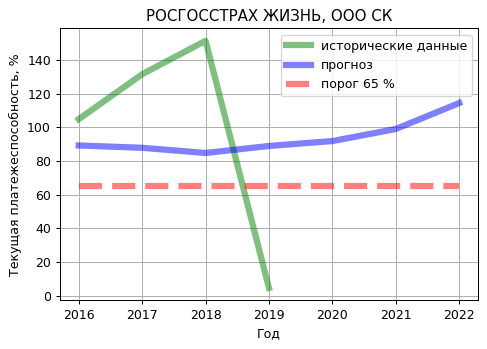

In [ ]:

files = ['https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/test_data/test.xlsx?raw=true',
         'https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/test_data/test1.xlsx?raw=true',
         'https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/test_data/test2.xlsx?raw=true',
         'https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/test_data/test3.xlsx?raw=true',
         'https://github.com/bubblegum2021/project_hse_insurance_2021_2022/blob/main/test_data/test4.xlsx?raw=true']
# здесь лежат 4 сценария темпов роста
# 1) оптимистичный
# 2) пессимистичный
# 3) случайный семпл из реальных данных
# 4) средний по всем семплам из реальных данных
temps = [temp_rosta_opt,temp_rosta_pes,
        pd.Series(((1*(X2017 / X2016) + 2*(X2018 / X2017) + 3*(X2019 / X2018))/6).dropna().sample().iloc[0]),
        temp_rosta]


############
### Пуск ###
############
print('Добрый день!')
print('Мы построим прогноз величины "Текущая платежеспособность, %" на 2020, 2021 и 2022 года')
print('Введите номер интересующей вас компании: ')
for i in range(len(files)):
    df = pd.read_excel(files[i])
    print(str(i+1)+')', df['Наименование'][0])
    
print()
print('###############')
n1 = int(input())
df = pd.read_excel(files[n1-1])

nazvanie_comp = df['Наименование'][0]

print('###############')
print()

print('Теперь выберите, пожалуйста, интересующий вас сценарий развития: ')
print('1) оптимистичные темпы роста')
print('2) пессимистичные темпы роста')
print('3) случайный сэмпл темпа роста из имеющегося распределения')
print('4) средний темп роста по имющимся данным')
print()
print('###############')
n2 = int(input())
temp_rosta = temps[n2-1]
print('###############')
print()

##############################
df.index = df['№']
# взяли только интересующие колонки
df = df[[x.replace('2019','2019') for x in name]]

# создали нужные дополнительные колонки 
df_test = df.copy()
df_test['Капитал/Активы'] = df_test['2019, Капитал, RUB'] / df_test['2019, Активы, RUB']
df_test['Страховые резервы/Активы'] = df_test['2019, Страховые резервы, RUB'] /df_test['2019, Активы, RUB']
df_test['Кредиторская задолженность/Активы'] = df_test['2019, Кредиторская задолженность, RUB'] / df_test['2019, Активы, RUB']
df_test['2019, Средняя страховая премия, RUB'] = np.log(df_test['2019, Средняя страховая премия, RUB'])
df_test['2019, Средняя страховая выплата, RUB'] = np.log(df_test['2019, Средняя страховая выплата, RUB'])
df = df_test.copy()

Xexam = df[[x.replace('2019','2019') for x in X_name]]
if Xexam.isna().any().sum() != 0:
    print('В этом датасете есть NaN в ключевых местах...')
    print('К сожалению, на этом программа перестает работать')
else:
    DATA1 = []
    DATA2 = []
    DATA3 = []
    
    yexam = df['2019, Текущая платежеспособность, %']
    ############################

    years = [2016,2017,2018,2019]
    print('Текущая платежеспособность (допустимо >= 65%)')
    for i in range(4):
        print(years[i],end=': ')
        print('исторические данные = '+str(np.round(yexam.iloc[i]*100,2)) + '%',end='   ')
        DATA1.append(np.round(yexam.iloc[i]*100,2))
        
        print('прогноз = '+str(np.round(model(Xexam)[i]*100,2))+'%')
        DATA2.append(np.round(model(Xexam)[i]*100,2))


    ##################
    print('________________')
    print()
    bufer = Xexam.loc[[2019]]

    years = [2020,2021,2022]

    for i in range(3):
        print(years[i],end=': ')
        print('прогноз = '+str(np.round(model(bufer * temp_rosta **(i+1))[0]*100,2))+'%')
        DATA3.append(np.round(model(bufer * temp_rosta **(i+1))[0]*100,2))
        

    ###### ГРАФИК #########
    plt.figure(dpi=90)

    plt.plot([2016,2017,2018,2019],DATA1,label='исторические данные',c='g',lw=5,alpha=0.5)
    plt.plot([2016,2017,2018,2019,2020,2021,2022],
             np.concatenate([DATA2,DATA3]),label='прогноз',c='b',lw=5,alpha=0.5)


    plt.plot([2016,2017,2018,2019,2020,2021,2022],
             65*np.ones(7),ls='--',label='порог 65 %',c='r',lw=5,alpha=0.5)

    plt.ylabel('Текущая платежеспособность, %')
    plt.xlabel('Год')
    plt.title(nazvanie_comp)
    plt.legend()
    plt.grid()

### 4. Задача <a name="4"></a>

Для компании ``СБЕРБАНК СТРАХОВАНИЕ ЖИЗНИ, ООО СК`` рассмотреть пессимистический сценарий и найти год, в который платежеспособность опустится ниже $65 \%$.

### 5. Справка <a name="5"></a>

Про ``целевую`` переменную:

$\text{Платежеспособность} = \frac{\text{Страховые премии по страхованию жизни – нетто перестрахование}}{\text{Выплаты по страхованию жизни – нетто-перестрахование}}\cdot 100 \%$

В разных аналитических отчетах дается разное пороговое значение, при котором следует считать высоким уровень риска, например, [здесь](https://www.vbrr.ru/corporate/credits/insurance/ot_insurance_comp.pdf)  $85 \%$ (то есть ниже плохо).

В качестве ``признаков`` были выбраны следующие показатели:

    1) 'Заключено договоров'
    2) 'Средняя страховая премия, RUB'
    3) 'Количество страховых выплат, разы'
    4) 'Средняя страховая выплата, RUB'
    5) 'Капитал/Активы'
    6) 'Страховые резервы/Активы'
    7) 'Кредиторская задолженность/Активы'
    8) 'Доля отказов выплат, %'
    9) 'Доля расходов на ведение дела (РВД), %'
    

``Итоговая модель``

$$ model(x) = \frac{1 \cdot model_{2016}(x) + 2 \cdot model_{2017}(x) + 3 \cdot model_{2018}(x) + 4 \cdot model_{2019}(x)}{1 + 2 + 3 + 4} $$

где $model_{\text{year}}(x)_{, \; \text{year} = 2016,2017,2018,2019}  $ - ridge-регрессия на данных соответствующего года:
$$||y - Xw||^2_2 + \alpha \cdot ||w||^2_2 \rightarrow \min $$

Сила регуляризации $\alpha > 0$ подбирается с помощью кросс-проверки, подробнее смотри [тут](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

Про ``темпы роста`` показателей (элементы списка temps): первые два темпа роста искусственные (оптимистический, пессимистический) - то есть значения подобраны из здравого смысла (поэтому модель игрушечная).

Например, в оптимистическом сценарии мы считаем, что будет заключено в 1.7 раз больше договоров, чем в предыдущем году и т.п. (см. ниже) (`2019` в названии игноририруем: как уже было отмечено раньше, для удобства в названиии данных любых годов стоит `2019`).

In [ ]:
temp_rosta_opt

2019, Заключено договоров                       1.7
2019, Средняя страховая премия, RUB             1.7
2019, Количество страховых выплат, разы         0.8
2019, Средняя страховая выплата, RUB            1.0
Капитал/Активы                                  1.0
Страховые резервы/Активы                        1.0
Кредиторская задолженность/Активы               0.5
2019, Доля отказов выплат, %                    1.0
2019, Доля расходов на ведение дела (РВД), %    1.0
dtype: float64

Третий и четвертый темп роста основаны на исторических данных. Напомним, что в датафреймах $X2016, X2017, X2018$ и $X2019$ находятся соответсвующие данные. В языке python очень удобно работать с таблицчными данными. Например, отношение $X2017/X2016$ даст нам темпы роста для каждой компании всех показателей (см. ниже) (для этого мы и извменяли все названия колонок так, чтобы там везде стоял `2019` год, иначе такая операция деления будет работать не совсем так, как нам хочется):

In [ ]:
(X2017 / X2016).head(3) # первые три компании

,"2019, Заключено договоров","2019, Средняя страховая премия, RUB","2019, Количество страховых выплат, разы","2019, Средняя страховая выплата, RUB",Капитал/Активы,Страховые резервы/Активы,Кредиторская задолженность/Активы,"2019, Доля отказов выплат, %","2019, Доля расходов на ведение дела (РВД), %"
Наименование,,,,,,,,,
"АБСОЛЮТ СТРАХОВАНИЕ, ООО",2.235328,0.920697,0.542746,1.068518,0.799593,1.096336,0.660767,0.705989,0.879417
"АДВАНТ, ООО",1.370353,1.003737,1.462048,0.996887,1.048186,1.007307,0.352938,0.236453,0.867654
"АК БАРС СТРАХОВАНИЕ, ООО",1.195075,0.986877,0.950719,1.049017,0.832155,1.252637,0.703568,1.520202,0.985816


Поэтому если мы запишем выражение $(1*(X2017 / X2016) + 2*(X2018 / X2017) + 3*(X2019 / X2018))/6$, то получим одну взвешенную таблицу темпов роста (поскольку в разные годы представлены разные компании, в этой таблице будут $NaN$, просто уберем их).

In [ ]:
((1*(X2017 / X2016) + 2*(X2018 / X2017) + 3*(X2019 / X2018))/6).dropna().head(3)

,"2019, Заключено договоров","2019, Средняя страховая премия, RUB","2019, Количество страховых выплат, разы","2019, Средняя страховая выплата, RUB",Капитал/Активы,Страховые резервы/Активы,Кредиторская задолженность/Активы,"2019, Доля отказов выплат, %","2019, Доля расходов на ведение дела (РВД), %"
Наименование,,,,,,,,,
"АБСОЛЮТ СТРАХОВАНИЕ, ООО",2.179502,0.931771,1.167634,1.013414,0.948585,0.982942,1.198391,0.710746,1.167859
"АК БАРС СТРАХОВАНИЕ, ООО",1.037335,1.020394,0.985837,1.000353,1.077723,1.039938,0.667957,1.207957,0.976592
"АЛЬФАСТРАХОВАНИЕ-ЖИЗНЬ, ООО",1.210968,0.993441,2.431874,0.982650,1.079003,1.004677,0.880416,0.729706,1.338180


Дальше мы можем либо усреднить все значения этой таблицы и получить один вектор темпов роста (только лучше усреднять изначально, а не после взвешивания - так будет использовано больше данных):

In [ ]:
temp_rosta = (1*(X2017 / X2016).mean() + 2*(X2018 / X2017).mean() + 3*(X2019 / X2018).mean())/6
temp_rosta

2019, Заключено договоров                       2.433846
2019, Средняя страховая премия, RUB             0.996185
2019, Количество страховых выплат, разы         1.349760
2019, Средняя страховая выплата, RUB            1.004085
Капитал/Активы                                  1.000656
Страховые резервы/Активы                        1.054851
Кредиторская задолженность/Активы               1.106016
2019, Доля отказов выплат, %                    1.734244
2019, Доля расходов на ведение дела (РВД), %    1.213404
dtype: float64

Либо сэмплировать (взять случайный элемент данной выборки):

In [ ]:
pd.Series(((1*(X2017 / X2016) + 2*(X2018 / X2017) + 3*(X2019 / X2018))/6).dropna().sample().iloc[0])

2019, Заключено договоров                       1.194361
2019, Средняя страховая премия, RUB             1.003294
2019, Количество страховых выплат, разы         1.467894
2019, Средняя страховая выплата, RUB            1.003082
Капитал/Активы                                  0.870663
Страховые резервы/Активы                        1.058331
Кредиторская задолженность/Активы               1.653787
2019, Доля отказов выплат, %                    3.906676
2019, Доля расходов на ведение дела (РВД), %    1.266470
Name: НСГ- РОСЭНЕРГО, ООО, dtype: float64

<p style="text-align: center;">конец</p>